In [212]:
import numpy as np
from sklearn import datasets

#GD를 활용한 LogisticRegression
class LogisticRegression:
    def __init__(self, learning_rate=0.01, threshold=0.01, max_iterations=100000, fit_intercept=True, verbose=False):
        self._learning_rate = learning_rate  # 학습 계수
        self._max_iterations = max_iterations  # 반복 횟수
        self._threshold = threshold  # 학습 중단 계수
        self._fit_intercept = fit_intercept  # 절편 사용 여부를 결정
        self._verbose = verbose  # 중간 진행사항 출력 여부

    # theta(W) 계수들 return
    def get_coeff(self):
        return self._W

    # 절편 추가
    def add_intercept(self, x_data):
        intercept = np.ones((x_data.shape[0], 1))
        return np.concatenate((intercept, x_data), axis=1)

    # 시그모이드 함수(로지스틱 함수)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):##어떤뜻인지 파악하기(cost function에 대한 이해필요(GD,SGD 찾아보기))
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    ## self._W = np.zeros(x_data.shape[1]) #x_data.shape[1] 구조에 값이 0인 매트릭스 생성 처음에 0
    ## z = np.dot(x_data, self._W) # z = x_data와, self._W의 곱 계산. 처음 0
    ## hypothesis = self.sigmoid(z) = z의 sigmoid 적용(가설값) 처음 0 
    ## diff = hypothesis - y_data # 실제값과 예측값의 차이
    ## cost = self.cost(hypothesis, y_data)

    ## def cost(self, h, y):
    ##      return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    ## self._W -= self._learning_rate * gradient  설정한 learning_rate * 기울기
    
      
    ## 원래의 Regression의 cost function이 [Cost =  Sum((예측된 y값 - 실제 y값) ^ 2) / n] 이었다면, 
    ## 매끈한 비용함수를 위하여 이 식을 보정해 주어야 한다. 이때, 단순히 log를 씌워 보정해주는 것이 아닌, 
    ## Y의 결과값 1과 0을 구분하여 수식을 만든다.
    
    ## 먼저, Y가 1인 경우에는 아래를 따른다. 
    ## cost = (1/n) * sum (-hypothesis) = (1/n) * sum (-log(sigmoid(Wx+b))) 
    ## Hypothesis의 예측값이 0에 가까워질수록 cost의 값이 커지는 것을 알 수 있다. 
    ## 이는 cost의 최저값을 찾는 모델 학습에 부합하는 개념이다.
    
    ## 다음으로 Y가 0인 경우에는 
    ## cost = (1/n) * sum( -log(1-sigmoid(Wx+b)))의 수식을 따른다. 
    ## 이 수식 역시 예측값이 부정확할수록 cost가 커지는 것을 알 수 있다.
    
    ## 수학적으로 이 두가지를 하나의 수식으로 합치면 다음과 같은 cost function으로 나타낼 수 있다.
    ## cost = Sum(-y*log(sigmoid(Wx+b)) - (1-y)*log(1-(sigmoid(Wx+b)))) / n


    def fit(self, x_data, y_data):
        num_examples, num_features = np.shape(x_data)

        if self._fit_intercept:
            x_data = self.add_intercept(x_data)

        
        self._W = np.zeros(x_data.shape[1]) # 컬럼 개수 만큼 0으로 채운 array 생성

        for i in range(self._max_iterations):
            z = np.dot(x_data, self._W) # x_data 구조로 z array 만듬.
            hypothesis = self.sigmoid(z)

            #실제값과 예측값의 차이
            diff = hypothesis - y_data

            cost = self.cost(hypothesis, y_data)

            ##어떤 과정인지 설명하기
            gradient = np.dot(x_data.transpose(), diff) / num_examples
            ## x_data의 역행렬과, 예측값과 실제값의 차이의 곱을  num_examples로 나눈 값.
            ## cost 함수의 편미분 즉 기울기
            
            self._W -= self._learning_rate * gradient # learnig_rate * gradient로 가중치 변경.

           
            if cost < self._threshold:
                return False

           
            if (self._verbose == True and i % 100 == 0):
                print('cost :', cost)

    def predict_prob(self, x_data):
        if self._fit_intercept:
            x_data = self.add_intercept(x_data)

        return self.sigmoid(np.dot(x_data, self._W))

    def predict(self, x_data):
        
        return self.predict_prob(x_data).round()##왜 라운드 함수를 쓰는지? 
                                                ##0,1 로 만들어 주기위해

In [213]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [214]:
df_temp = df.copy()

In [215]:
# df_temp = pd.get_dummies(df_temp, prefix=['Gender']).head(10)

In [216]:
df_temp.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [217]:
df_temp['Gender'] = df_temp.Gender.map({'Male' : 1, 'Female' : 2})

In [218]:
df_temp = df_temp.drop(columns=['User ID'])

In [219]:
df_temp['Age'].min()

18

In [220]:
df_temp['Age'].max()

60

In [221]:
df_temp['EstimatedSalary'].min()

15000

In [222]:
df_temp['EstimatedSalary'].max()

150000

In [223]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

x = df_temp.drop(columns=['Purchased'])
y = df_temp['Purchased']
scaler_X.fit(x)
x = pd.DataFrame(scaler_X.transform(x), index=x.index, columns=x.columns)
# scaler_Y.fit(y)
# y = pd.DataFrame(scaler_Y.transform(y), index=y.index, columns=y.columns)

In [225]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [236]:
#위의 random_state = 42 를 사용하면 88.75% 아래의 코드로 split 하면 73,75%
# x_train = x[:int(len(x) * 80 / 100)]
# y_train = y[:int(len(y) * 80 / 100)]
# x_test = x[int(len(x) * 80 / 100) :]
# y_test = y[int(len(y) * 80 / 100) :]

In [226]:
x_train.head()

,Gender,Age,EstimatedSalary
3,1.0,0.214286,0.311111
18,0.0,0.666667,0.096296
202,1.0,0.500000,0.881481
250,1.0,0.619048,0.177778
274,1.0,0.928571,0.081481


In [227]:
x_train.shape

(320, 3)

In [228]:
y_train.shape

(320,)

In [229]:
ln = LogisticRegression()

In [230]:
ln.fit(x_train, y_train)

In [231]:
pre = ln.predict(x_test)

In [232]:
pre

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [233]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

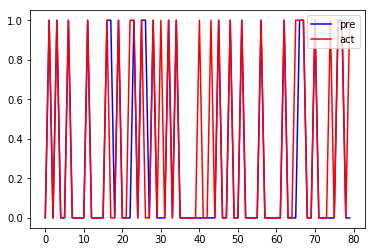

In [234]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(pre, 'b', label='pre')
loss_ax.plot(np.array(y_test), 'r', label='act')

loss_ax.legend(loc='upper right')

plt.show()

In [235]:
count = 0
for i in range(len(pre)):
    if pre[i] == np.array(y_test)[i]:
        count += 1

print((count/len(pre))*100, '%')

88.75 %


In [237]:
print((pre==y_test).mean())

0.8875
